In [216]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

from sklearn.manifold import *
from sklearn.decomposition import *
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
#from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans

from scipy import stats
import math

from time import time

from scipy.misc import imread, imresize

pd.set_option('max_rows', 10)

from sklearn.metrics import confusion_matrix, accuracy_score, auc, log_loss

from sklearn.cross_validation import StratifiedShuffleSplit

In [20]:
df = pd.read_csv('Data/Output 2016-06-10 19-53-39.csv')

In [21]:
n_rows, n_feat = df.shape
print(n_feat)

1275


In [22]:
X = df.ix[:,0:n_feat-1]
Y = pd.DataFrame(df.ix[:,n_feat-1])

In [23]:
labels = pd.get_dummies(Y)

In [24]:
labels.shape

(1919, 9)

In [25]:
X.shape

(1919, 1274)

In [26]:
# LLE
print("Computing LLE embedding")
t0 = time()
inputs, err = locally_linear_embedding(X.values, n_neighbors=15, n_components=2, method="standard")
inputs = pd.DataFrame(inputs)
t1 = time()
print("Done. Reconstruction error: %g. Time %.2f sec" % ( err, (t1 - t0)))


Computing LLE embedding
Done. Reconstruction error: 2.46081e-06. Time 6.94 sec


In [27]:
Y.Class = Y.Class.astype('category')

In [168]:
Y.Class.cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
1914    8
1915    8
1916    8
1917    8
1918    8
dtype: int8

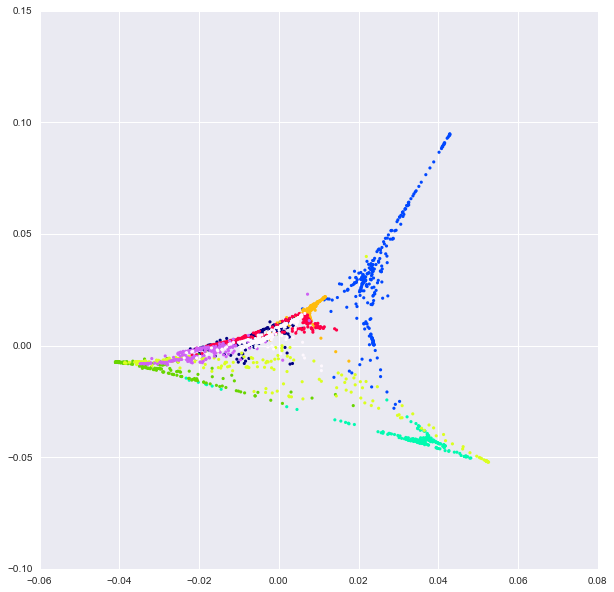

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)


In [29]:
pca = PCA(n_components=2).fit_transform(X)

In [30]:
pca[:,0]

array([-5.21124247, -4.81069394, -4.0247741 , ...,  8.13923404,
        8.056428  ,  7.56646227])

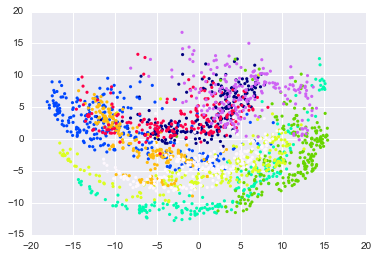

In [31]:
plt.scatter(pca[:,0],pca[:,1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)

In [32]:

X_ = X.as_matrix()
Y_ = Y.Class.cat.codes.as_matrix()

In [33]:
Y_

array([0, 0, 0, ..., 8, 8, 8], dtype=int8)

In [34]:
sss = StratifiedShuffleSplit(Y_, 3, test_size=0.7)

for train_index, test_index in sss:
    X_train, X_test = X_[train_index], X_[test_index]
    #Y_train, Y_test = labels.iloc[train_index], labels.iloc[test_index]
    Y_train, Y_test = Y_[train_index], Y_[test_index]

In [35]:
Y_train

array([7, 6, 1, 0, 1, 1, 8, 1, 3, 2, 5, 7, 3, 5, 6, 2, 1, 4, 4, 0, 8, 1, 8,
       4, 1, 2, 2, 6, 0, 8, 4, 3, 5, 0, 4, 6, 5, 0, 3, 6, 8, 7, 6, 6, 3, 0,
       8, 2, 0, 2, 6, 6, 7, 2, 5, 3, 1, 8, 0, 1, 5, 5, 6, 1, 3, 3, 6, 4, 3,
       6, 7, 5, 0, 6, 2, 0, 0, 4, 0, 2, 6, 1, 3, 0, 3, 3, 0, 5, 3, 6, 5, 7,
       4, 0, 2, 7, 7, 4, 6, 7, 2, 6, 3, 4, 2, 0, 3, 1, 4, 7, 4, 7, 3, 1, 2,
       7, 1, 3, 5, 5, 1, 2, 5, 8, 6, 1, 4, 2, 1, 8, 5, 5, 7, 4, 3, 5, 8, 6,
       6, 2, 6, 8, 7, 3, 2, 6, 3, 1, 7, 4, 4, 6, 5, 3, 0, 1, 8, 2, 6, 3, 6,
       1, 6, 7, 7, 3, 6, 8, 7, 7, 6, 5, 1, 0, 2, 8, 2, 0, 1, 7, 3, 3, 8, 2,
       0, 7, 1, 2, 1, 0, 8, 3, 7, 5, 2, 8, 6, 0, 5, 7, 8, 6, 4, 8, 2, 7, 2,
       0, 7, 4, 1, 1, 0, 0, 0, 1, 1, 1, 5, 4, 4, 3, 6, 0, 6, 1, 5, 0, 5, 4,
       6, 3, 8, 1, 5, 4, 8, 4, 6, 4, 1, 2, 4, 1, 5, 8, 3, 5, 5, 6, 4, 3, 5,
       3, 4, 5, 5, 4, 2, 7, 5, 4, 6, 8, 1, 4, 1, 8, 5, 8, 6, 8, 4, 6, 5, 1,
       7, 0, 6, 2, 7, 4, 5, 8, 2, 2, 2, 8, 4, 3, 1, 7, 7, 1, 6, 7, 2, 5, 6,
       5, 8,

In [36]:
clf = svm.SVC(decision_function_shape='ovo', probability=True)
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
pred_train = clf.predict_proba(X_train)
pred_test = clf.predict_proba(X_test)
pred_test_class = clf.predict(X_test)

In [38]:
log_loss(Y_test, pred_test)

0.45945921088987313

In [39]:
log_loss(Y_train, pred_train)

0.28550565329780347

In [40]:
confusion_matrix(Y_test, pred_test_class)

array([[105,   0,   0,   0,   0,  10,   2,  29,   0],
       [  0, 177,   2,   0,   0,   1,   1,   0,   1],
       [  0,   4, 126,   0,  10,   0,   0,   0,   0],
       [  0,   1,   2, 134,   6,   0,   0,   5,   0],
       [  0,   9,   3,  10, 108,   0,   0,   0,  16],
       [  0,   0,   0,   0,   0, 137,   5,   0,   2],
       [  6,   6,   0,   0,   0,  26,  91,  16,   0],
       [  0,   0,   0,  12,   2,   0,   0, 133,   0],
       [  0,   1,   0,   6,   5,   4,   0,   0, 129]])

In [58]:
labels = Y.Class.cat.categories.values

In [63]:
pd.crosstab(Y_test, pred_test_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,105,0,0,0,0,10,2,29,0,146
1,0,177,2,0,0,1,1,0,1,182
2,0,4,126,0,10,0,0,0,0,140
3,0,1,2,134,6,0,0,5,0,148
4,0,9,3,10,108,0,0,0,16,146
5,0,0,0,0,0,137,5,0,2,144
6,6,6,0,0,0,26,91,16,0,145
7,0,0,0,12,2,0,0,133,0,147
8,0,1,0,6,5,4,0,0,129,145


In [74]:
c = 0
for i in labels:
    print(str(c) + " "+ i)
    c += 1

0 cityhall
1 deep1
2 deep2
3 fountain
4 gun
5 spurn
6 statue_family
7 statue_net
8 steam


In [92]:
outcomes = pd.DataFrame({'TrueVal' : Y_test, 'PredVal' : pred_test_class, 'Correct': np.nan})
outcomes = outcomes[[2,1,0]]

In [107]:
outcomes.Correct = 0
outcomes.loc[outcomes['TrueVal'] == outcomes['PredVal'], 'Correct'] = 1

In [144]:
idx = outcomes[(outcomes['Correct'] == 0) & (outcomes['TrueVal'] == 6)].index.values

In [145]:
outcomes.iloc[idx]

,TrueVal,PredVal,Correct
13,6,7,0
20,6,1,0
35,6,5,0
39,6,0,0
58,6,5,0
...,...,...,...
1229,6,5,0
1250,6,5,0
1288,6,7,0
1296,6,1,0


In [146]:
test = pd.DataFrame(pred_test[idx])
test

,0,1,2,3,4,5,6,7,8
0,0.047215,0.001514,0.001098,0.039729,0.014603,0.007540,0.031720,0.849325,0.007257
1,0.035568,0.396355,0.002286,0.002563,0.003345,0.004317,0.324932,0.228564,0.002070
2,0.032463,0.120764,0.003731,0.002628,0.017356,0.451699,0.361147,0.004981,0.005231
3,0.661464,0.000787,0.000459,0.001597,0.004143,0.002470,0.213088,0.114950,0.001042
4,0.011547,0.016003,0.000378,0.000205,0.000677,0.897705,0.072437,0.000812,0.000236
...,...,...,...,...,...,...,...,...,...
49,0.066817,0.070043,0.004799,0.002109,0.043917,0.391661,0.397808,0.004576,0.018271
50,0.036643,0.115272,0.002547,0.002875,0.004452,0.311193,0.516090,0.007675,0.003255
51,0.035278,0.002039,0.001836,0.034477,0.008533,0.003237,0.412319,0.498292,0.003990
52,0.021491,0.498748,0.002872,0.001920,0.024892,0.318086,0.122975,0.005688,0.003329


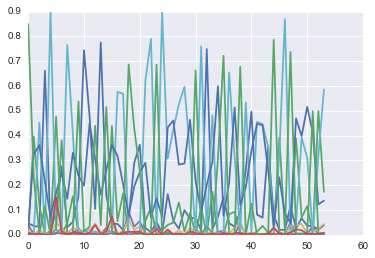

In [147]:
plt.plot(test)

In [133]:
np.mean(test[8])

0.22391166196264045

## Lets Test it all - Visualise the incorrect classes

In [175]:
pred_test = clf.predict_proba(X_)
pred_test_class = clf.predict(X_)

In [179]:
pd.crosstab(Y_, pred_test_class, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,All
True,,,,,,,,,,
0,158,0,0,0,0,13,4,34,0,209
1,0,254,2,0,0,2,1,0,1,260
2,0,4,185,0,10,0,0,0,1,200
3,0,1,3,194,6,0,0,8,0,212
4,0,14,3,12,159,0,1,1,19,209
5,0,0,0,0,0,196,7,0,2,205
6,7,6,0,0,0,31,141,22,0,207
7,0,0,0,17,2,0,0,191,0,210
8,0,1,0,8,5,4,0,0,189,207


In [180]:
outcomes = pd.DataFrame({'TrueVal' : Y_, 'PredVal' : pred_test_class, 'Correct': np.nan})
outcomes = outcomes[[2,1,0]]

outcomes.Correct = 0
outcomes.loc[outcomes['TrueVal'] == outcomes['PredVal'], 'Correct'] = 1

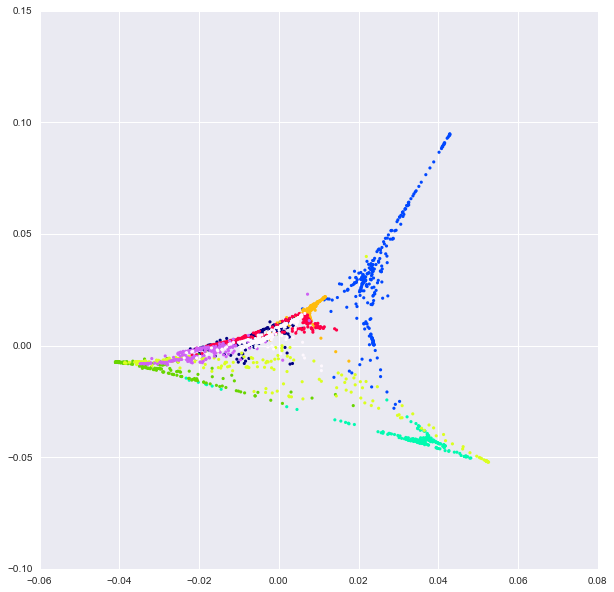

In [182]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)


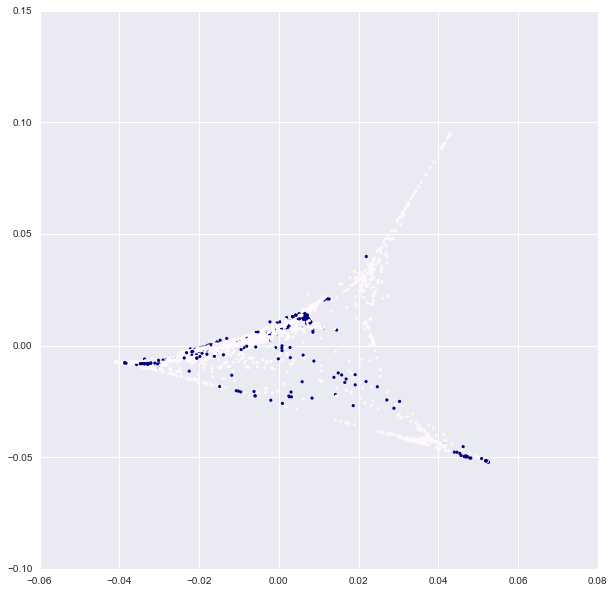

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(inputs[0],inputs[1], c=outcomes.Correct, cmap='gist_ncar', s=10, lw = 0)


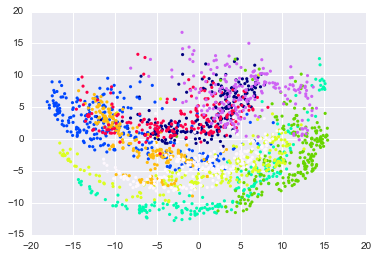

In [184]:
plt.scatter(pca[:,0],pca[:,1], c=Y.Class.cat.codes, cmap='gist_ncar', s=10, lw = 0)

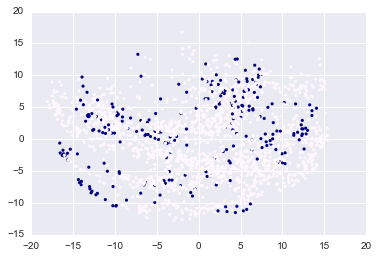

In [185]:
plt.scatter(pca[:,0],pca[:,1], c=outcomes.Correct, cmap='gist_ncar', s=10, lw = 0)

In [186]:
## Get the files which went wrong

In [189]:
working_folder = '../Data/LapsitData/'
df = pd.read_csv(working_folder + '/data.csv')
df

,Folder,File
0,cityhall,Proj4_img00000001.jpg
1,cityhall,Proj4_img00000002.jpg
2,cityhall,Proj4_img00000003.jpg
3,cityhall,Proj4_img00000004.jpg
4,cityhall,Proj4_img00000005.jpg
...,...,...
1914,steam,Proj6_img00000203.jpg
1915,steam,Proj6_img00000204.jpg
1916,steam,Proj6_img00000205.jpg
1917,steam,Proj6_img00000206.jpg


In [240]:
c = 0
for i in labels:
    print(str(c) + " "+ i)
    c += 1

0 cityhall
1 deep1
2 deep2
3 fountain
4 gun
5 spurn
6 statue_family
7 statue_net
8 steam


In [246]:
idx = outcomes[(outcomes['Correct'] == 0) & (df.Folder == 'fountain')].index.values
idx.shape

(18,)

In [247]:
sample = df.iloc[idx]
sample

,Folder,File
711,fountain,Proj3_img00000043.jpg
768,fountain,Proj3_img00000100.jpg
789,fountain,Proj3_img00000121.jpg
831,fountain,Proj3_img00000163.jpg
832,fountain,Proj3_img00000164.jpg
...,...,...
869,fountain,Proj3_img00000201.jpg
872,fountain,Proj3_img00000204.jpg
873,fountain,Proj3_img00000205.jpg
874,fountain,Proj3_img00000206.jpg


In [248]:
n = 5
m = int(math.ceil(len(idx) / n))

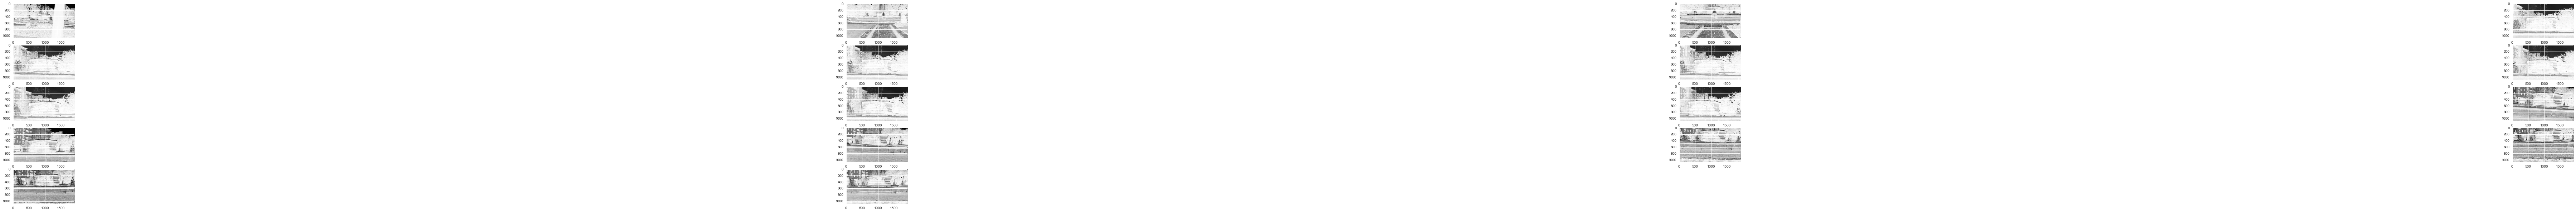

In [249]:
#fig, ax = plt.subplots(n, m, figsize=(160,10))
fig = plt.figure(figsize=(160,10))
count = 0
for i in idx:
    ax = fig.add_subplot(n, m, count+1) # this line adds sub-axes
    f = df['File'].iloc[i]
    fol = df['Folder'].iloc[i]
    img = imread(working_folder + fol +'/' + f, mode="F")
    ax.imshow(img)
    count+=1